## Lending Club Case Study ##

### Data Exploration ###

In [54]:
import pandas as pd 

loan_df = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

/Users/r0r00i9/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [55]:
loan_df.shape

(39717, 111)

In [56]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [57]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [58]:
#loan_df = loan_df.drop(['desc','url'], axis=1)
loan_df =loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,dti_joint,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,il_util,initial_list_status,inq_fi,inq_last_12m,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,max_bal_bc,member_id,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,mths_since_last_major_derog,mths_since_last_record,mths_since_rcnt_il,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,next_pymnt_d,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,open_acc_6m,open_il_12m,open_il_24m,open_il_6m,open_rv_12m,open_rv_24m,out_prncp,out_prncp_inv,pct_tl_nvr_dlq,percent_bc_gt_75,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
0,0,NaN,AZ,NaN,24000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,NaN,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,NaN,f,NaN,NaN,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,NaN,1296599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,5863.155187,5833.84,863.16,0.00,5000.00,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,NaN,860xx
1,0,NaN,GA,NaN,30000.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,1.00,NaN,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,NaN,f,NaN,NaN,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,NaN,1314167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,1008.710000,1008.71,435.17,0.00,456.46,NaN,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Source Verified,NaN,309xx
2,0,NaN,IL,NaN,12252.0,NaN,INDIVIDUAL,NaN,NaN,NaN,0.0,0.00,0.0,0,0,NaN,8.72,NaN,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,NaN,f,NaN,NaN,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,NaN,1313524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,3005.666844,3005.67,605.67,0.00,2400.00,NaN,https://lendingclub.com/browse/loanDetail.act

In [59]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                      0.0
acc_open_past_24mths              100.0
addr_state                          0.0
all_util                          100.0
annual_inc                          0.0
annual_inc_joint                  100.0
application_type                    0.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0
chargeoff_within_12_mths            0.0
collection_recovery_fee             0.0
collections_12_mths_ex_med          0.0
delinq_2yrs                         0.0
delinq_amnt                         0.0
desc                               33.0
dti                                 0.0
dti_joint                         100.0
earliest_cr_line                    0.0
emp_length                          3.0
emp_title                           6.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
grade                               0.0
home_ownership                      0.0


In [60]:
loan_df = loan_df.dropna(axis=1, how='all', thresh=717)

In [61]:
loan_df.shape

(39717, 57)

In [62]:
100*round(loan_df.isnull().sum()/len(loan_df.index),2)

acc_now_delinq                 0.0
addr_state                     0.0
annual_inc                     0.0
application_type               0.0
chargeoff_within_12_mths       0.0
collection_recovery_fee        0.0
collections_12_mths_ex_med     0.0
delinq_2yrs                    0.0
delinq_amnt                    0.0
desc                          33.0
dti                            0.0
earliest_cr_line               0.0
emp_length                     3.0
emp_title                      6.0
funded_amnt                    0.0
funded_amnt_inv                0.0
grade                          0.0
home_ownership                 0.0
id                             0.0
initial_list_status            0.0
inq_last_6mths                 0.0
installment                    0.0
int_rate                       0.0
issue_d                        0.0
last_credit_pull_d             0.0
last_pymnt_amnt                0.0
last_pymnt_d                   0.0
loan_amnt                      0.0
loan_status         

In [63]:
loan_df.drop(['next_pymnt_d','mths_since_last_record'], axis=1, inplace=True)

In [64]:
loan_df.shape

(39717, 55)

In [65]:
loan_df.head()

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,zip_code
0,0,AZ,24000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,27.65,Jan-85,10+ years,NaN,5000,4975.0,B,RENT,1077501,f,1,162.87,10.65%,Dec-11,May-16,171.62,Jan-15,5000,Fully Paid,1296599,NaN,3,0.00,0.00,1,0,0.0,credit_card,n,0.00,13648,83.70%,B2,0.0,36 months,Computer,9,5863.155187,5833.84,863.16,0.00,5000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Verified,860xx
1,0,GA,30000.0,INDIVIDUAL,0.0,1.11,0.0,0,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,1.00,Apr-99,< 1 year,Ryder,2500,2500.0,C,RENT,1077430,f,5,59.83,15.27%,Dec-11,Sep-13,119.66,Apr-13,2500,Charged Off,1314167,NaN,3,0.00,0.00,1,0,0.0,car,n,117.08,1687,9.40%,C4,0.0,60 months,bike,4,1008.710000,1008.71,435.17,0.00,456.46,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Source Verified,309xx
2,0,IL,12252.0,INDIVIDUAL,0.0,0.00,0.0,0,0,NaN,8.72,Nov-01,10+ years,NaN,2400,2400.0,C,RENT,1077175,f,2,84.33,15.96%,Dec-11,May-16,649.91,Jun-14,2400,Fully Paid,1313524,NaN,2,0.00,0.00,1,0,0.0,small_business,n,0.00,2956,98.50%,C5,0.0,36 months,real estate business,10,3005.666844,3005.67,605.67,0.00,2400.00,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,Not Verified,606xx
3,0,CA,49200.0,INDIVIDUAL,0.0,0.00,0.0,0,0,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",20.00,Feb-96,10+ years,AIR RESOURCES BOARD,10000,10000.0,C,RENT,1076863,f,1,339.31,13.49%,Dec-11,Apr-16,357.48,Jan-15,10000,Fully Paid,1277178,35.0,10,0.00,0.00,1,0,0.0,other,n,0.00,5598,21%,C1,0.0,36 months,personel,37,12231.890000,12231.89,2214.92,16.97,10000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,Source Verified,917xx
4,0,OR,80000.0,INDIVIDUAL,0.0,0.00,0.0,0,0,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and freeing up some extra each month to pay toward other bills. I've always been a good payor but have found myself needing to make adjustments to my budget due to a medical scare. My job is very stable, I love it.<br>",17.94,Jan-96,1 year,University Medical Group,3000,3000.0,B,RENT,1075358,f,0,67.79,12.69%,Dec-11,May-16,67.79,May-16,3000,Current,1311748,38.0,15,524.06,524.06,1,0,0.0,other,n,0.00,27783,53.90%,B5,0.0,60 months,Personal,38,3513.330000,3513.33,1037.39,0.00,2475.94,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,Source Verified,972xx


In [66]:
loan_df.describe()

,acc_now_delinq,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,funded_amnt,funded_amnt_inv,id,inq_last_6mths,installment,last_pymnt_amnt,loan_amnt,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,recoveries,revol_bal,tax_liens,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
count,39717.0,3.971700e+04,39661.0,39717.000000,39661.0,39717.000000,39717.0,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,14035.000000,39717.000000,39717.000000,39717.000000,39717.0,39717.000000,39020.000000,39717.000000,39717.000000,39678.0,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,0.0,6.896893e+04,0.0,12.406112,0.0,0.146512,0.0,13.315130,10947.713196,10397.448868,6.831319e+05,0.869200,324.561922,2678.826162,11219.443815,8.504636e+05,35.900962,9.294408,51.227887,50.989768,1.0,0.055065,0.043260,95.221624,13382.528086,0.0,22.088828,12153.596544,11567.149118,2263.663172,1.363015,9793.348813
std,0.0,6.379377e+04,0.0,148.671593,0.0,0.491812,0.0,6.678594,7187.238670,7128.450439,2.106941e+05,1.070219,208.874874,4447.136012,7456.670694,2.656783e+05,22.020060,4.400282,375.172839,373.824457,0.0,0.237200,0.204324,688.744771,15885.016641,0.0,11.401709,9042.040766,8942.672613,2608.111964,7.289979,7065.522127
min,0.0,4.000000e+03,0.0,0.000000,0.0,0.000000,0.0,0.000000,500.000000,0.000000,5.473400e+04,0.000000,15.690000,0.000000,500.000000,7.069900e+04,0.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,4.040400e+04,0.0,0.000000,0.0,0.000000,0.0,8.170000,5400.000000,5000.000000,5.162210e+05,0.000000,167.020000,218.680000,5500.000000,6.667800e+05,18.000000,6.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,3703.000000,0.0,13.000000,5576.930000,5112.310000,662.180000,0.000000,4600.000000
50%,0.0,5.900000e+04,0.0,0.000000,0.0,0.000000,0.0,13.400000,9600.000000,8975.000000,6.656650e+05,1.000000,280.220000,546.140000,10000.000000,8.508120e+05,34.000000,9.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,8850.000000,0.0,20.000000,9899.640319,9287.150000,1348.910000,0.000000,8000.000000
75%,0.0,8.230000e+04,0.0,0.000000,0.0,0.000000,0.0,18.600000,15000.000000,14400.000000,8.377550e+05,1.000000,430.780000,3293.160000,15000.000000,1.047339e+06,52.000000,12.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,17058.000000,0.0,29.000000,16534.433040,15798.810000,2833.400000,0.000000,13653.260000
max,0.0,6.000000e+06,0.0,7002.190000,0.0,11.000000,0.0,29.990000,35000.000000,35000.000000,1.077501e+06,8.000000,1305.190000,36115.200000,35000.000000,1.314167e+06,120.000000,44.000000,6311.470000,6307.370000,1.0,4.000000,2.000000,29623.350000,149588.000000,0.0,90.000000,58563.679930,58563.680000,23563.680000,180.200000,35000.020000


In [67]:
loan_df[loan_df.chargeoff_within_12_mths.isnull()]

,acc_now_delinq,addr_state,annual_inc,application_type,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,desc,dti,earliest_cr_line,emp_length,emp_title,funded_amnt,funded_amnt_inv,grade,home_ownership,id,initial_list_status,inq_last_6mths,installment,int_rate,issue_d,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,loan_amnt,loan_status,member_id,mths_since_last_delinq,open_acc,out_prncp,out_prncp_inv,policy_code,pub_rec,pub_rec_bankruptcies,purpose,pymnt_plan,recoveries,revol_bal,revol_util,sub_grade,tax_liens,term,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,zip_code
39629,0,NY,19000.0,INDIVIDUAL,NaN,0.00,NaN,0,0,"I'm currently a fourth-year PhD candidate in English at Columbia University, just beginning my dissertation. I'm hoping to get a loan to help with the living expenses that my stipend doesn't cover; this will enable me to complete my degree much faster than if I were to spend part of my time now working at another job. I'll also be able to pay off my credit cards and thus avoid high rates. Thanks!",8.15,Apr-99,2 years,Columbia University,6000,600.0,C,RENT,131387,f,0,195.27,10.59%,Oct-07,Sep-10,198.80,Oct-10,6000,Fully Paid,113921,0.0,6,0.0,0.0,1,0,NaN,educational,n,0.00,8528,86.10%,C2,0.0,36 months,finishing PhD & refinancing credit card,7,7029.694130,702.97,1029.69,0.00,6000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=131387,Not Verified,100xx
39642,0,MA,118000.0,INDIVIDUAL,NaN,0.00,NaN,0,0,consolidate debt,0.43,Jun-91,10+ years,U.S. Government,2000,1575.0,A,MORTGAGE,127213,f,0,61.87,7.12%,Sep-07,Apr-10,3.06,Apr-10,2000,Fully Paid,85483,NaN,14,0.0,0.0,1,0,NaN,debt_consolidation,n,0.00,4709,18.50%,A1,NaN,36 months,consolidate debt,8,2219.432551,1747.80,219.43,0.00,2000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=127213,Not Verified,020xx
39650,0,MA,65000.0,INDIVIDUAL,NaN,0.00,NaN,0,0,I'd like to pay off a car loan.,0.28,Dec-94,10+ years,Revere Public Schools,5000,2025.0,A,MORTGAGE,84918,f,1,155.38,7.43%,Sep-07,Jun-07,4268.52,Apr-08,5000,Fully Paid,84914,NaN,12,0.0,0.0,1,0,NaN,other,n,0.00,1576,5.70%,A2,NaN,36 months,car,21,5200.462983,2106.19,200.46,0.00,5000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=84918,Not Verified,024xx
39659,0,CA,100000.0,INDIVIDUAL,NaN,0.00,NaN,0,0,"I took a high interest loan from Citibank in 2005 that I can now refinance at better rates because my credit score has improved. The balance due under the loan is $4,000.",15.00,May-99,< 1 year,NaN,4000,1925.0,B,NONE,121568,f,1,128.41,9.64%,Aug-07,Aug-07,129.76,Sep-10,4000,Fully Paid,121574,NaN,6,0.0,0.0,1,0,NaN,other,n,0.00,8155,14.90%,B4,NaN,36 months,Refinancing high interest loan,8,4622.489229,2224.58,622.49,0.00,4000.00,https://lendingclub.com/browse/loanDetail.action?loan_id=121568,Not Verified,950xx
39660,0,MA,120000.0,INDIVIDUAL,NaN,0.00,NaN,0,0,"The family is expanding in October and we are trying to prepare the best we can. We heard of Lending Club on Facebook and would like to borrow $2,800. Thank you for contributing!",15.00,May-99,< 1 year,NaN,2800,1625.0,B,NONE,121535,f,1,88.65,8.70%,Aug-07,Aug-07,89.80,Sep-10,2800,Fully Paid,121373,NaN,6,0.0,0.0,1,0,NaN,other,n,0.00,8155,14.90%,B1,NaN,36 months,Baby is coming,8,3191.218575,1852.05,391.22,0.00,2800.00,https://lendingclub.com/browse/loanDetail.action?loan_id=121535,Not Verified,024xx
39666,0,VA,40000.0,INDIVIDUAL,NaN,3.09,NaN,0,0,Thank you for reviewing my request. This loan will be used to pay off credit cards and a doctor bill. The credit cards that will be paid are as follows: American Express $700 30% American Express $7036 30% Visa $5000 10.99% JC Penny $708 21% Kohls $408 21.99% Doctor bill $1000 I earn $2356 a month and my husband earns $3624 a month. We earn together $5980 a month. Our expenses are as follows: Mortgage $1876 2nd mortgage $680 Utilities $300 Cars payment $556 Gas (car) $220 cell phones $167 cr

In [69]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [72]:
#Drop Current loans from the analysis as that is not relevant
loan_df = loan_df[loan_df.loan_status != 'Current']

In [74]:
loan_df.shape

(38577, 55)

In [85]:
# converting type of columns to 'category'
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
#fully paid = 0 , charged_off = 1
loan_df['loan_status'].replace(to_replace=['Fully Paid', 'Charged Off'], value=[1, 0], inplace=True)


<AxesSubplot:>

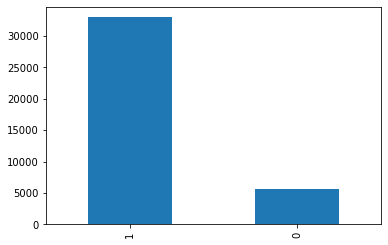

In [86]:
import  seaborn as sns
loan_df.loan_status_cat.value_counts().plot.bar()

In [88]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
loan_df= loan_df.drop(columns_tobe_dropped,axis=1) 


In [89]:
loan_df.shape

(38577, 44)

In [93]:
loan_df.to_csv("cleaned.csv", index=False)